Pearson correlation between Average Completion Rate and Logged GDP per capita: r = 0.67, p-value = 3.05e-06
Pearson correlation between Average Proficiency and Logged GDP per capita: r = 0.44, p-value = 5.65e-03


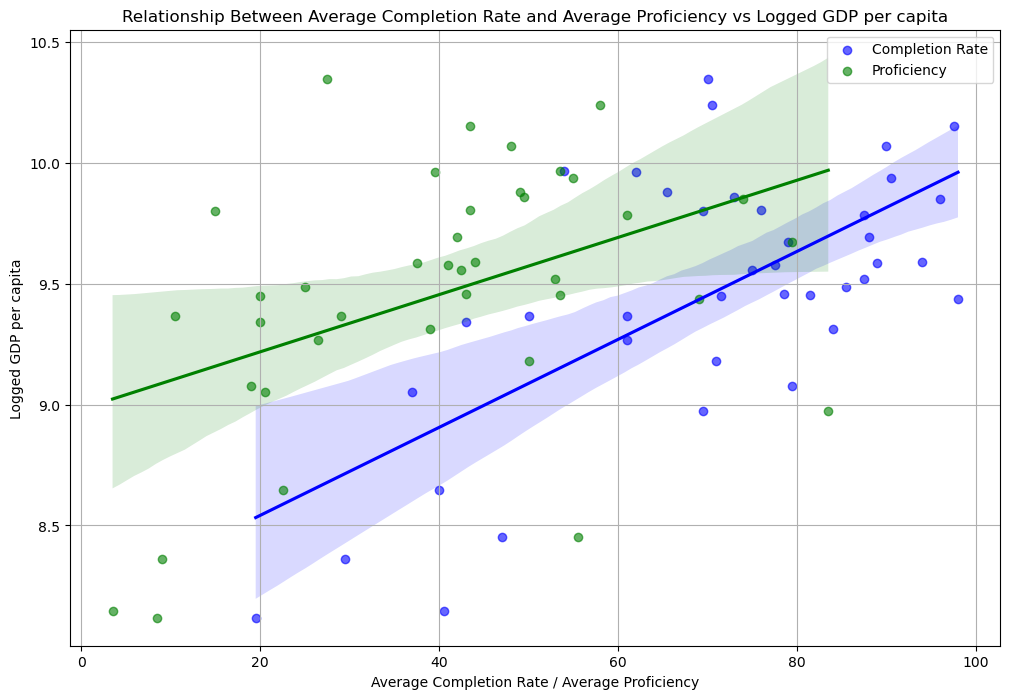

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)

# Calculate the average completion rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Calculate the average proficiency
df['Average_Proficiency'] = df[['Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)

# Filter out rows where 'Logged GDP per capita', 'Average_Completion_Rate', and 'Average_Proficiency' are 0
filtered_data = df[(df['Logged GDP per capita'] != 0) & (df['Average_Completion_Rate'] != 0) & (df['Average_Proficiency'] != 0)]

# Create a combined plot
plt.figure(figsize=(12, 8))

# Plot the relationship between Average Completion Rate and Logged GDP per capita
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Logged GDP per capita', scatter_kws={'alpha': 0.6}, label='Completion Rate', color='b')

# Plot the relationship between Average Proficiency and Logged GDP per capita
sns.regplot(data=filtered_data, x='Average_Proficiency', y='Logged GDP per capita', scatter_kws={'alpha': 0.6}, label='Proficiency', color='g')

# Calculate Pearson correlation coefficients and p-values
r_completion, p_value_completion = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Logged GDP per capita'])
r_proficiency, p_value_proficiency = pearsonr(filtered_data['Average_Proficiency'], filtered_data['Logged GDP per capita'])

# Print correlation results
print(f'Pearson correlation between Average Completion Rate and Logged GDP per capita: r = {r_completion:.2f}, p-value = {p_value_completion:.2e}')
print(f'Pearson correlation between Average Proficiency and Logged GDP per capita: r = {r_proficiency:.2f}, p-value = {p_value_proficiency:.2e}')

# Add titles and labels
plt.title('Relationship Between Average Completion Rate and Average Proficiency vs Logged GDP per capita')
plt.xlabel('Average Completion Rate / Average Proficiency')
plt.ylabel('Logged GDP per capita')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


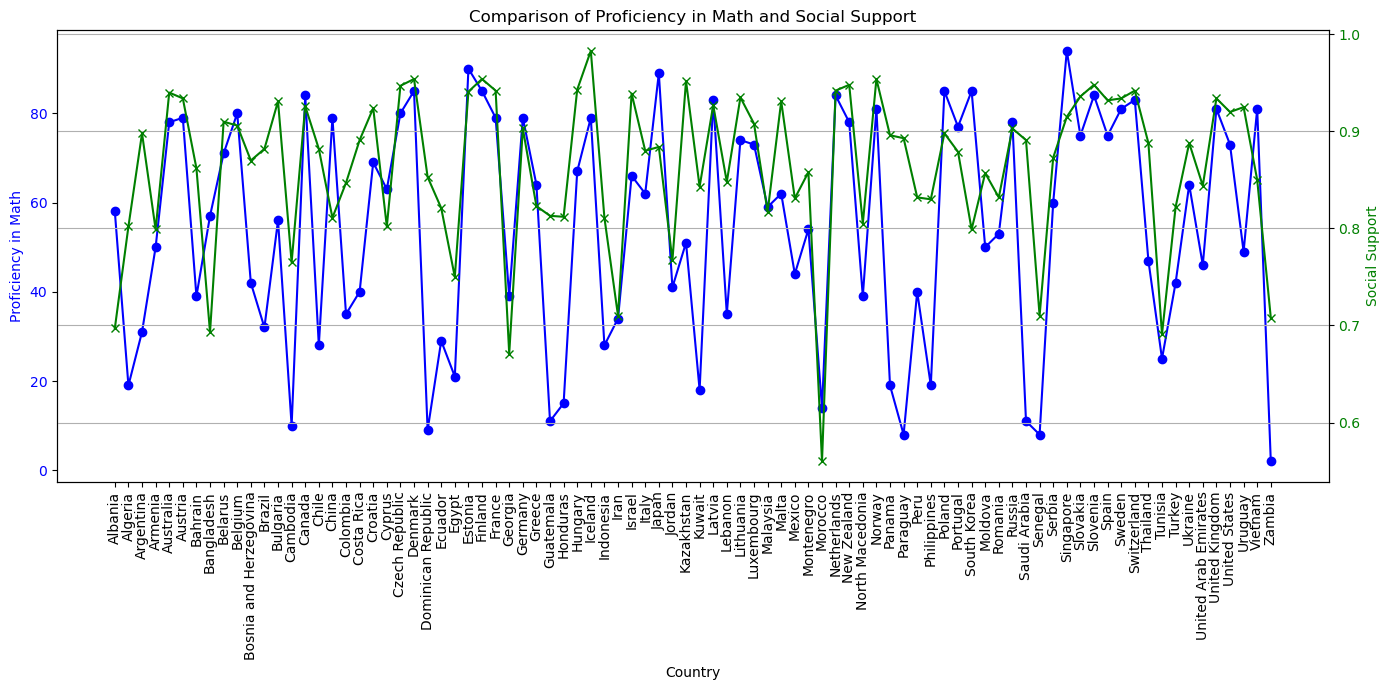

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'filtered_global_education_world_happiness_average.csv'
data = pd.read_csv(file_path)

# Filter out countries with a zero math proficiency score
filtered_data = data[data['Lower_Secondary_End_Proficiency_Math'] != 0]

# Prepare the data for plotting
countries = filtered_data['Country']
proficiency_math = filtered_data['Lower_Secondary_End_Proficiency_Math']
social_support = filtered_data['Social support']

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Proficiency Math
ax1.set_xlabel('Country')
ax1.set_ylabel('Proficiency in Math', color='blue')
ax1.plot(countries, proficiency_math, label='Proficiency in Math', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Social Support', color='green')
ax2.plot(countries, social_support, label='Social Support', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Comparison of Proficiency in Math and Social Support')

# Rotate country names vertically
ax1.tick_params(axis='x', labelrotation=90)

fig.tight_layout()
plt.grid(True)

plt.show()
